In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import math
import seaborn as sns
from scipy import optimize
from scipy.optimize import minimize
from scipy.interpolate import interp1d


In [45]:
def prepare_params(systemf,system_in):    
    path1='/Users/psz898/OneDrive/Documents/SCIENCE/UCPH/info_comp/cpmg_for_korznev/cpmg_fit/ci2/'
    #systemf = 'backups_wt2/'
    
    
    file_dat = open(f'{path1}{systemf}fit_allr_allt_2st_ord2.dat')
    
    count = 0
    res = []
    field = []
    temp = []
    cpmgfr = []
    r2eff_exp = []
    r2eff_exp_err = []
    r2eff_fit = []
    r2eff_fit_err = []
    
    regex = re.compile("\s+(\d+)\s+N\-S\s+(\d+)\s+(\d+)\s+\d+.\d+\s+\d+\s+(\d+).\d+\s+(\d+.\d+)\s+(\d+.\d+)\s+(\d+.\d+)\s+(\d+.\d+)")
    
    
    while True: 
        count += 1
      
        # Get next line from file 
        line = file_dat.readline() 
      
        # if line is empty 
        # end of file is reached 
        if not line: 
            break
        result = regex.search(line)
    
    
        #print("Line{}: {}".format(count, line.strip())) 
        if result:
            #print (result.group(1), result.group(2), result.group(3), result.group(4), result.group(5),result.group(6), result.group(7), result.group(8))
    
            res.append(int(result.group(1)))
            field.append(int(result.group(2)))
            temp.append(int(result.group(3)))
            cpmgfr.append(int(result.group(4)))
            r2eff_exp.append(float(result.group(5)))
            r2eff_exp_err.append(float(result.group(6)))
            r2eff_fit.append(float(result.group(7)))
            r2eff_fit_err.append(float(result.group(8)))
    
        
    file_dat.close() 
    
    
    rows, cols = (8, 1) 
    CPMGfit = [[0 for i in range(cols)] for j in range(rows)]
    
    CPMGfit[0]=res
    CPMGfit[1]=field
    CPMGfit[2]=temp
    CPMGfit[3]=cpmgfr
    CPMGfit[4]=r2eff_exp
    CPMGfit[5]=r2eff_exp_err
    CPMGfit[6]=r2eff_fit
    CPMGfit[7]=r2eff_fit_err
    CPMGfit_tr= np.array(CPMGfit).T
    
    df = pd.DataFrame(CPMGfit_tr,columns=["res", "field", "temp","cpmgfr","r2eff_exp","r2eff_exp_err","r2eff_fit","r2eff_fit_err"])
    df['res']= df['res'].astype(int)
    df['field']= df['field'].astype(int)
    df['temp']= df['temp'].astype(int)
    df['cpmgfr']= df['cpmgfr'].astype(int)
    
    df = df.replace(10000, 2000)
    df['system']=system_in                 
    # df24_600_5 = df[(df['res']==24) & (df['field']==600) & (df['temp']==5)]
    # df24_600_5
    # df24_600 = df[(df['res']==24) & (df['field']==600)]
    # #df24_600
    
    dfr= df[(df['cpmgfr']==80) | (df['cpmgfr']==2000)]#
    return df, dfr

In [46]:
df_WT,dfr_WT = prepare_params('backups_wt2/','WT')
df_L49I,dfr_L49I = prepare_params('backups_l49i/','L49I')
df_I57V,dfr_I57V = prepare_params('backups_i57v/','I57V')
df_L49I_I57V,dfr_L49I_I57V = prepare_params('backups_l49i_i57v/','L49I/I57V')

df_all = [df_WT, df_L49I, df_I57V,df_L49I_I57V]
df = pd.concat(df_all).iloc[0::1].reset_index()
df=df.drop(columns=['index'])

dfr_all = [dfr_WT, dfr_L49I, dfr_I57V,dfr_L49I_I57V]
dfr = pd.concat(dfr_all).iloc[0::1].reset_index()
dfr=dfr.drop(columns=['index'])


In [47]:
df

,res,field,temp,cpmgfr,r2eff_exp,r2eff_exp_err,r2eff_fit,r2eff_fit_err,system
0,24,600,5,80,17.9160,0.4860,17.883492,0.004474,WT
1,24,600,5,160,14.3568,0.3850,14.470640,0.087431,WT
2,24,600,5,240,12.5655,0.4107,12.460259,0.065663,WT
3,24,600,5,320,11.4244,0.3994,11.429644,0.000172,WT
4,24,600,5,480,10.5424,0.4186,10.533666,0.000435,WT
...,...,...,...,...,...,...,...,...,...
955,47,750,25,640,9.9941,0.6533,9.799613,0.088625,L49I/I57V
956,47,750,25,800,9.0787,0.4494,9.153687,0.027842,L49I/I57V
957,47,750,25,960,8.4948,0.4865,8.646874,0.097712,L49I/I57V
958,47,750,25,1120,8.1446,0.6362,8.255521,0.030397,L49I/I57V


In [48]:
# df_all_600=df.loc[(600)].reset_index()
# df_all_750=df.loc[(750)].reset_index()
# df_all_600_5 = df.loc[(600,5)].reset_index()
# df_all_600_25 = df.loc[(600,25)].reset_index()
# df_all_750_5 = df.loc[(750,5)].reset_index()
# df_all_750_25 = df.loc[(750,25)].reset_index()

df_all_600=df[df['field']==600]
df_all_600

,res,field,temp,cpmgfr,r2eff_exp,r2eff_exp_err,r2eff_fit,r2eff_fit_err,system
0,24,600,5,80,17.9160,0.4860,17.883492,0.004474,WT
1,24,600,5,160,14.3568,0.3850,14.470640,0.087431,WT
2,24,600,5,240,12.5655,0.4107,12.460259,0.065663,WT
3,24,600,5,320,11.4244,0.3994,11.429644,0.000172,WT
4,24,600,5,480,10.5424,0.4186,10.533666,0.000435,WT
...,...,...,...,...,...,...,...,...,...
945,47,600,25,640,8.0078,0.3626,8.011127,0.000084,L49I/I57V
946,47,600,25,800,7.6708,0.4398,7.596511,0.028532,L49I/I57V
947,47,600,25,960,7.1766,0.3923,7.271469,0.058480,L49I/I57V
948,47,600,25,1120,7.1708,0.3845,7.020608,0.152580,L49I/I57V


In [49]:

#dfr.groupby(['res','field','temp']).sum()

def calc_rex(x):
    x = np.asarray(x)
    return x[0] - x[1]

def calc_rex_err(x):
    x = np.asarray(x)
    return (x[0]**2 + x[1]**2)**0.5

# dfrex = dfr.groupby(['res','field','temp'])['r2eff_exp'].agg(lambda x: calc_rex(x)).to_frame()
# dfrex_err = dfr.groupby(['res','field','temp'])['r2eff_exp_err'].agg(lambda x: calc_rex_err(x)).to_frame()
dfrex = dfr.groupby(['field','temp','system','res'])['r2eff_exp'].agg(lambda x: calc_rex(x)).to_frame()
dfrex_err = dfr.groupby(['field','temp','system','res'])['r2eff_exp_err'].agg(lambda x: calc_rex_err(x)).to_frame()

dfrex['r2eff_exp_err']=dfrex_err['r2eff_exp_err']
dfrex.head(50)
# #dfrex.loc[("24","600","5"),"r2eff_exp"]
# #dfrex.loc[[24]]
# #dfrex.loc[(24)]
df600=dfrex.loc[(600)].reset_index()
df750=dfrex.loc[(750)].reset_index()

df600_5 = dfrex.loc[(600,5)].reset_index()
df600_25 = dfrex.loc[(600,25)].reset_index()
df750_5 = dfrex.loc[(750,5)].reset_index()
df750_25 = dfrex.loc[(750,25)].reset_index()

# #abar = sns.barplot(y='r2eff_exp',x='res',data=df600,hue='temp');
df600_5

dfrex

r2eff_exp  r2eff_exp_err
field temp system res                          
600   5    I57V   24      7.4263       0.808581
                  26     12.8487       1.462013
                  40      4.7808       0.554233
                  44     20.6832       1.347598
                  45     15.8853       0.972604
...                          ...            ...
750   25   WT     26      3.0072       0.687120
                  40      1.7259       0.593591
                  44     14.2712       0.910864
                  45      5.3315       0.667254
                  47      5.5259       0.806345

[96 rows x 2 columns]

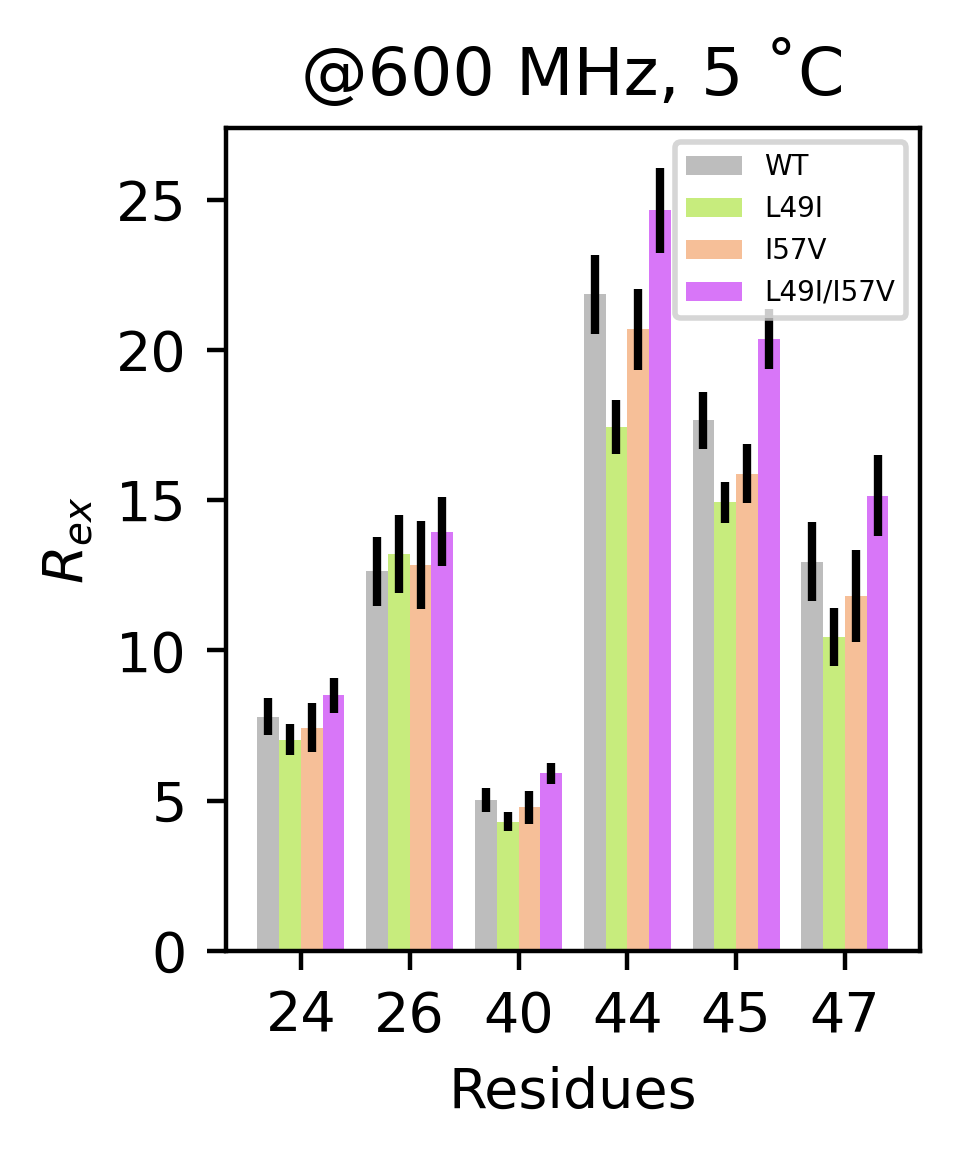

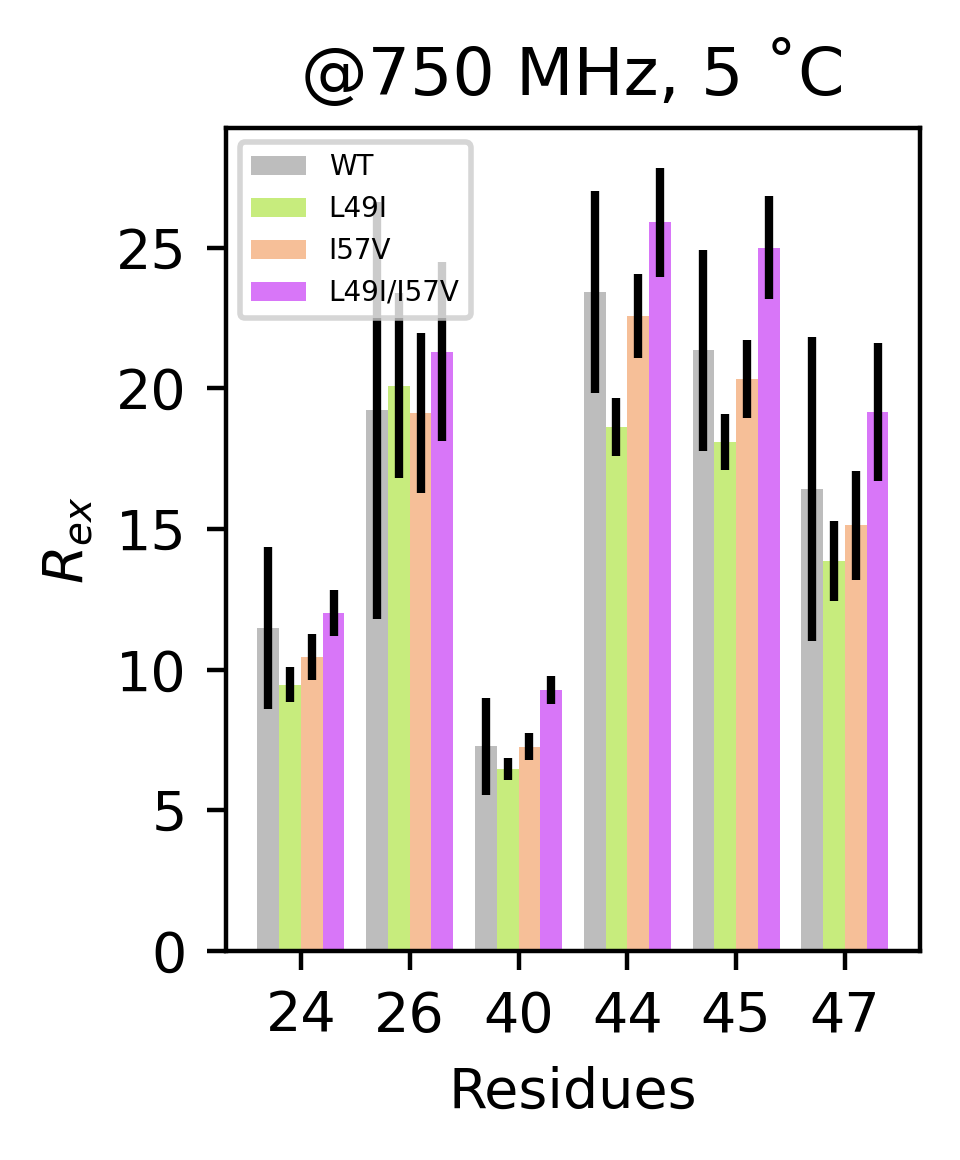

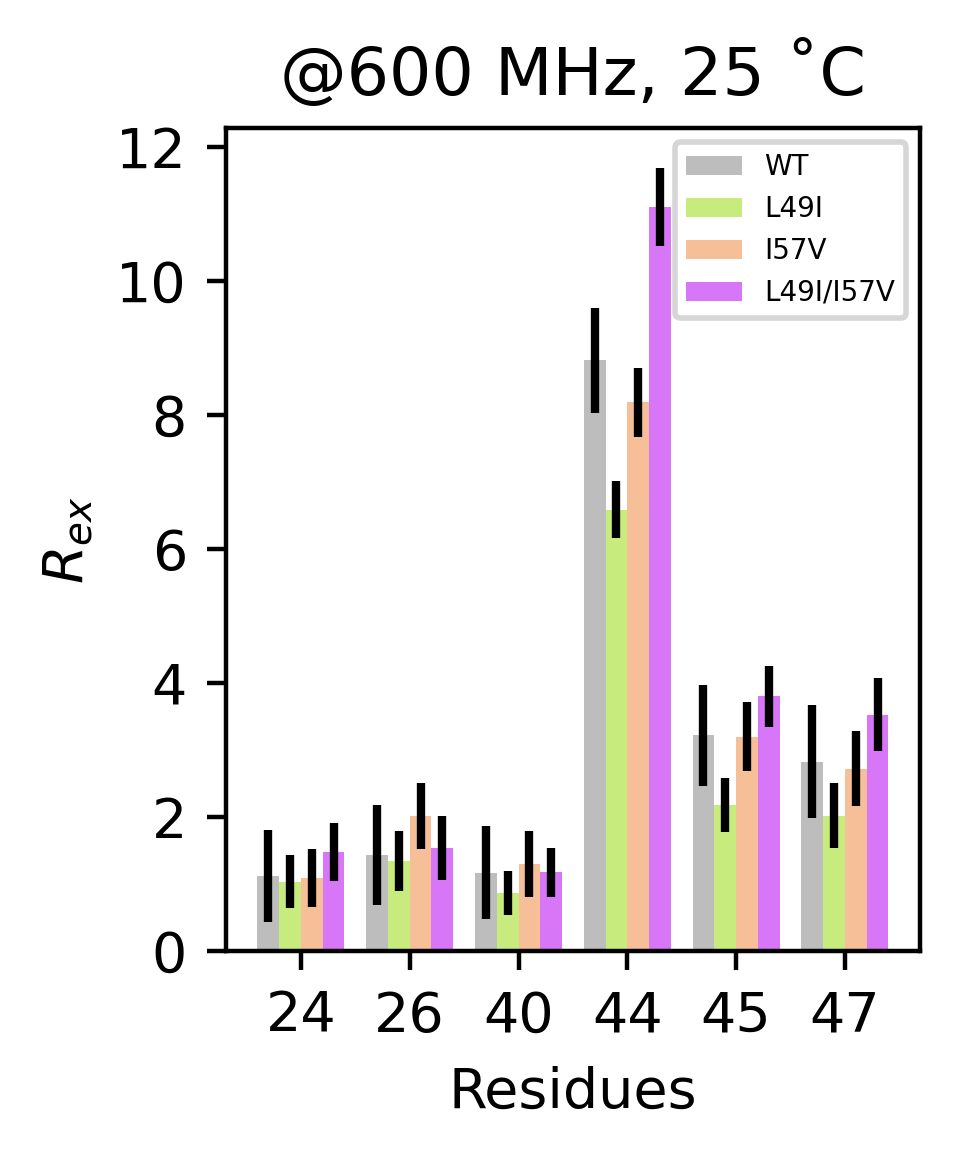

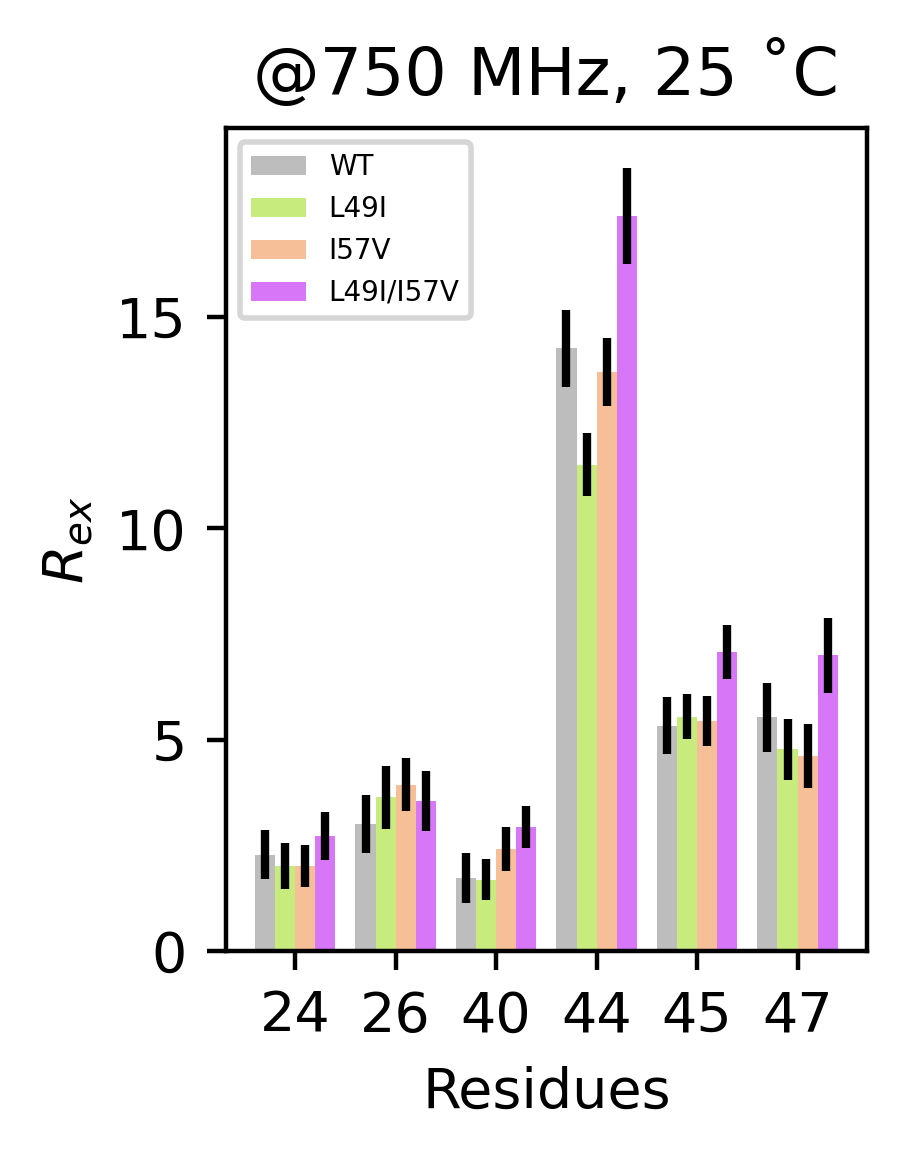

In [50]:
#color=['#226894', '#e47632', '#1e873a', '#c03439', '#8c67a6']
color=['#bdbdbd', '#c7ec7d', '#f6bf98', '#d876f8']

def grouped_barplot(df, cat,subcat, val , err, field, temp):
    fig, axs = plt.subplots(ncols=1,figsize=(2.5,3),dpi=400)
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    subx = ['WT', 'L49I', 'I57V', 'L49I/I57V']
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        axs.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{} {}".format(subcat, gr), yerr=dfg[err].values, color=color[i])
    #plt.xlabel(cat)
    plt.xlabel("Residues")    
    #plt.ylabel(val)
    plt.ylabel('$ R_{ex} $')
    plt.xticks(x, u)
    plt.title(f"@{field} MHz, {temp} ˚C")
    #plt.title( '$ S^2_{axis} $ @' + str(field) +' MHz')#, fontsize = 20
    #plt.title( '$ S^2_{axis} $ @' + str(field) +' MHz')
    plt.legend(['WT', 'L49I', 'I57V', 'L49I/I57V'],ncol=1,prop={"size":5})
    #plt.legend()
    #plt.show()
    #plt.yticks([0,10,20,30]);
    plt.tight_layout()
    plt.savefig(f'CI2_WT_Rex_{field}MHz_T{temp}.pdf');

cat = "res"
subcat = "system"
val = "r2eff_exp"
err = "r2eff_exp_err"

field=600;temp=5
grouped_barplot(df600_5, cat, subcat, val, err, field, temp )

field=750;temp=5
grouped_barplot(df750_5, cat, subcat, val, err, field, temp )

field=600;temp=25
grouped_barplot(df600_25, cat, subcat, val, err, field, temp )

field=750;temp=25
grouped_barplot(df750_25, cat, subcat, val, err, field, temp )

In [51]:
# def grouped_barplot(df, cat,subcat, val , err):
#     fig, axs = plt.subplots(ncols=1,figsize=(3,2),dpi=400)
#     u = df[cat].unique()
#     x = np.arange(len(u))
#     subx = df[subcat].unique()
#     offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
#     width= np.diff(offsets).mean()
#     for i,gr in enumerate(subx):
#         dfg = df[df[subcat] == gr]
#         axs.bar(x+offsets[i], dfg[val].values, width=width, 
#                 label="{} {}".format(subcat, gr), yerr=dfg[err].values, color=color[i])
#     plt.xlabel(cat)
#     plt.ylabel(val)
#     plt.xticks(x, u)
#     plt.legend()
#     plt.show()

In [52]:
df
df[(df['res']==24) & (df['field']==600)]

,res,field,temp,cpmgfr,r2eff_exp,r2eff_exp_err,r2eff_fit,r2eff_fit_err,system
0,24,600,5,80,17.9160,0.4860,17.883492,0.004474,WT
1,24,600,5,160,14.3568,0.3850,14.470640,0.087431,WT
2,24,600,5,240,12.5655,0.4107,12.460259,0.065663,WT
3,24,600,5,320,11.4244,0.3994,11.429644,0.000172,WT
4,24,600,5,480,10.5424,0.4186,10.533666,0.000435,WT
...,...,...,...,...,...,...,...,...,...
745,24,600,25,640,7.1146,0.2862,7.133650,0.004431,L49I/I57V
746,24,600,25,800,6.8950,0.3459,6.951268,0.026462,L49I/I57V
747,24,600,25,960,6.5996,0.3114,6.808409,0.449638,L49I/I57V
748,24,600,25,1120,6.5940,0.3053,6.698213,0.116516,L49I/I57V


In [53]:
from scipy.interpolate import interp1d

#df = pd.DataFrame(CPMGfit_tr,columns=["res", "field", "temp","cpmgfr","r2eff_exp","r2eff_exp_err","r2eff_fit","r2eff_fit_err"])

dfp = df[(df['res']==24) & (df['field']==600) & (df['temp']==25)& (df['system']=='WT')]

xnew = np.linspace(80, 2000, num=4001, endpoint=True)
x=dfp['cpmgfr']
y=dfp['r2eff_fit']
f = interp1d(x, y, kind='cubic')

# print(x,y,f(xnew))
# plt.plot(x, y, 'o', xnew, f(xnew), '-')

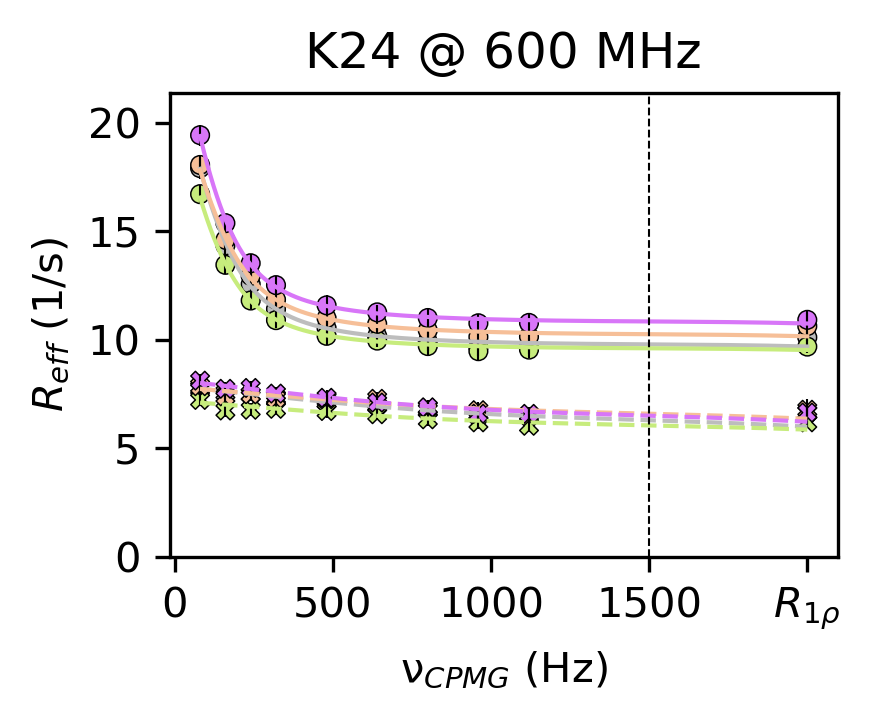

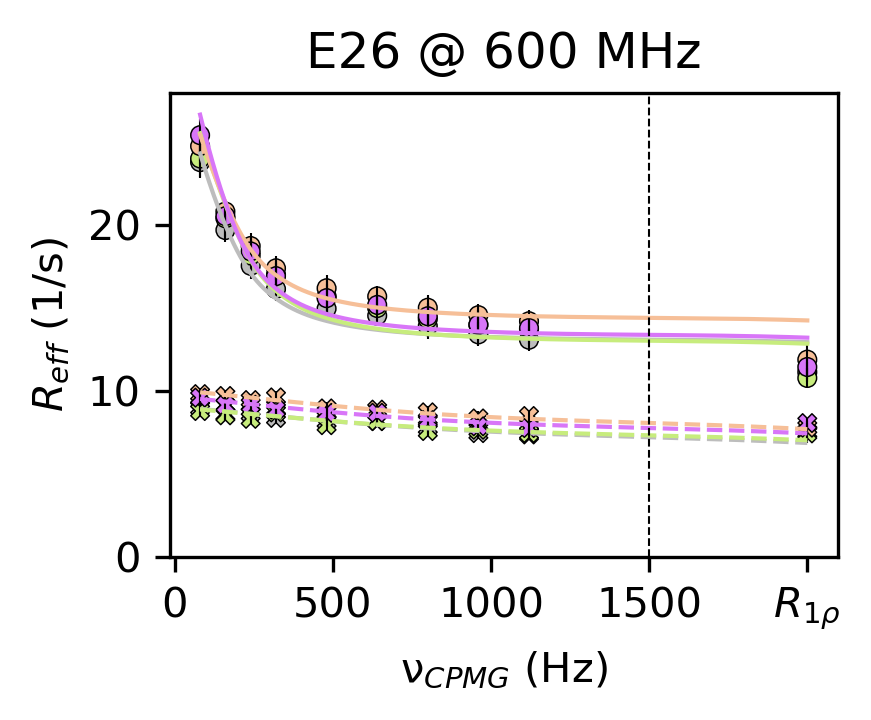

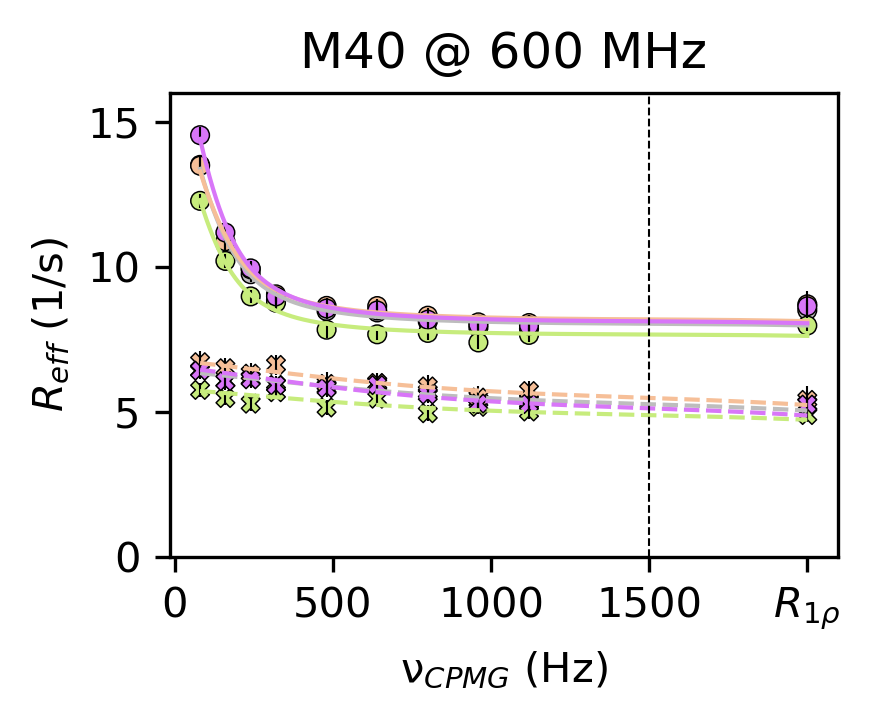

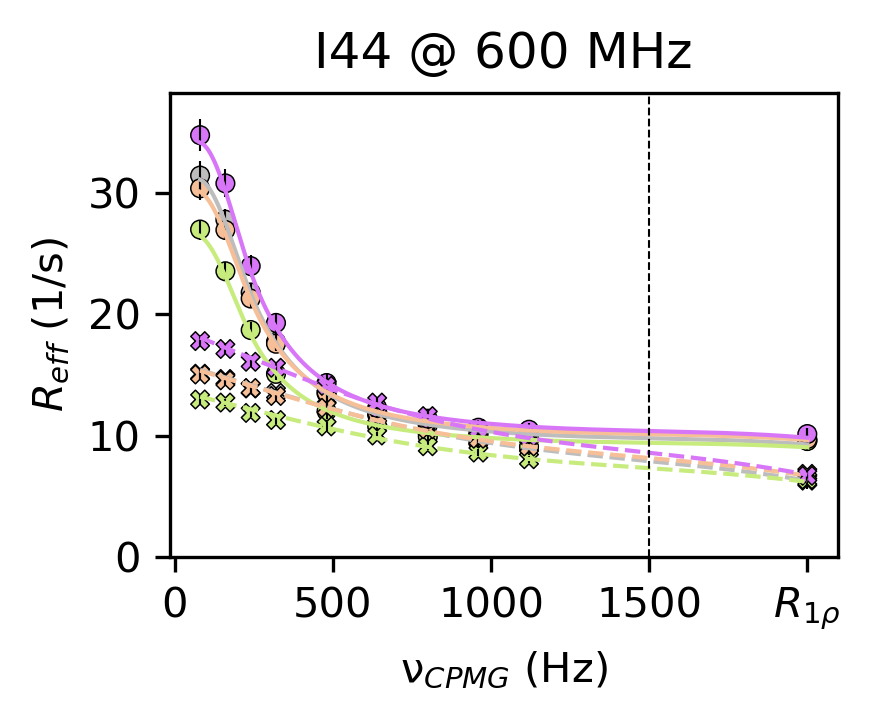

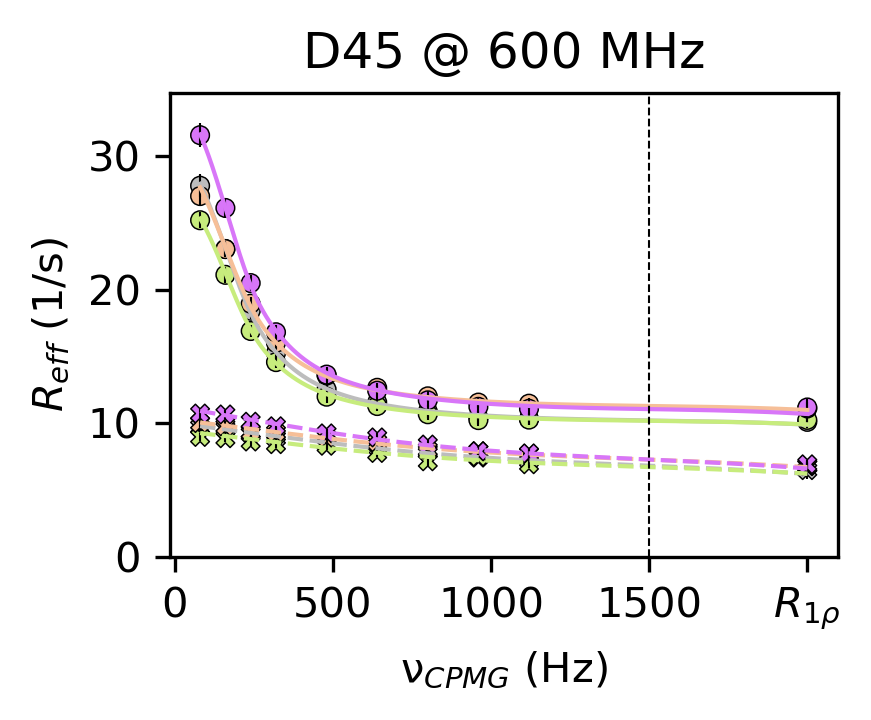

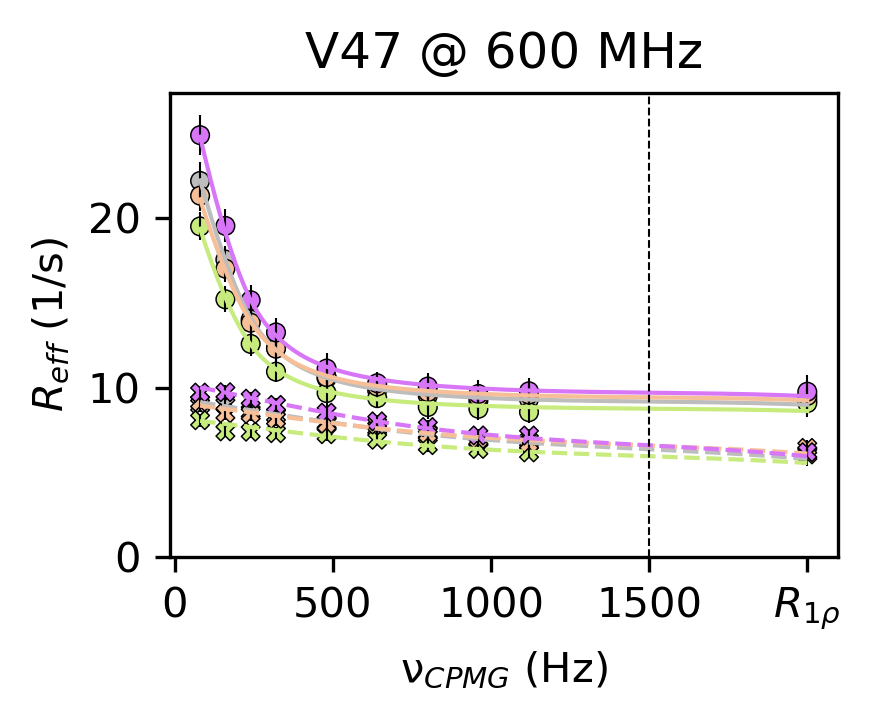

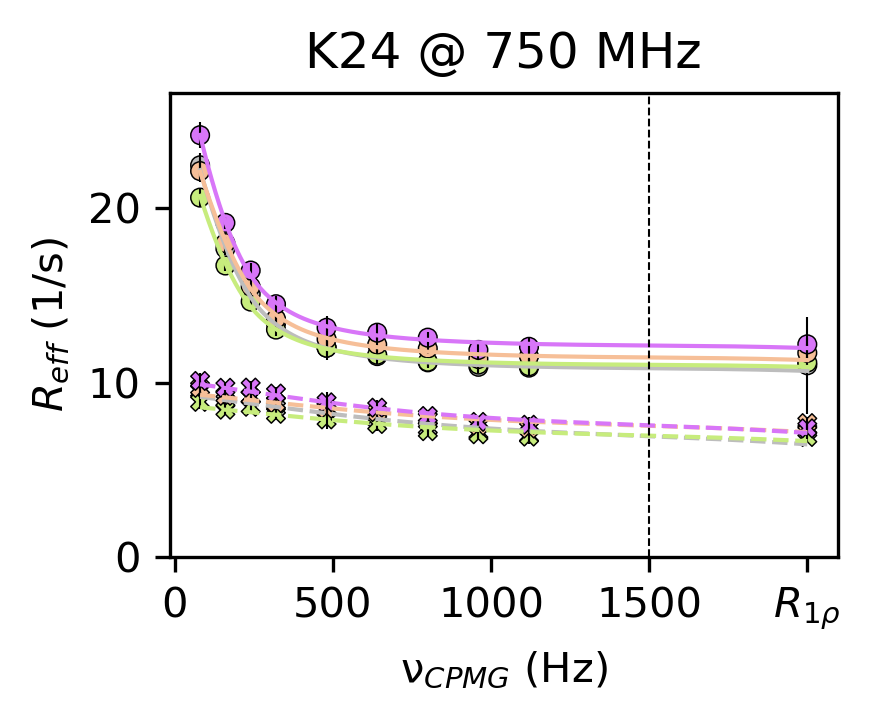

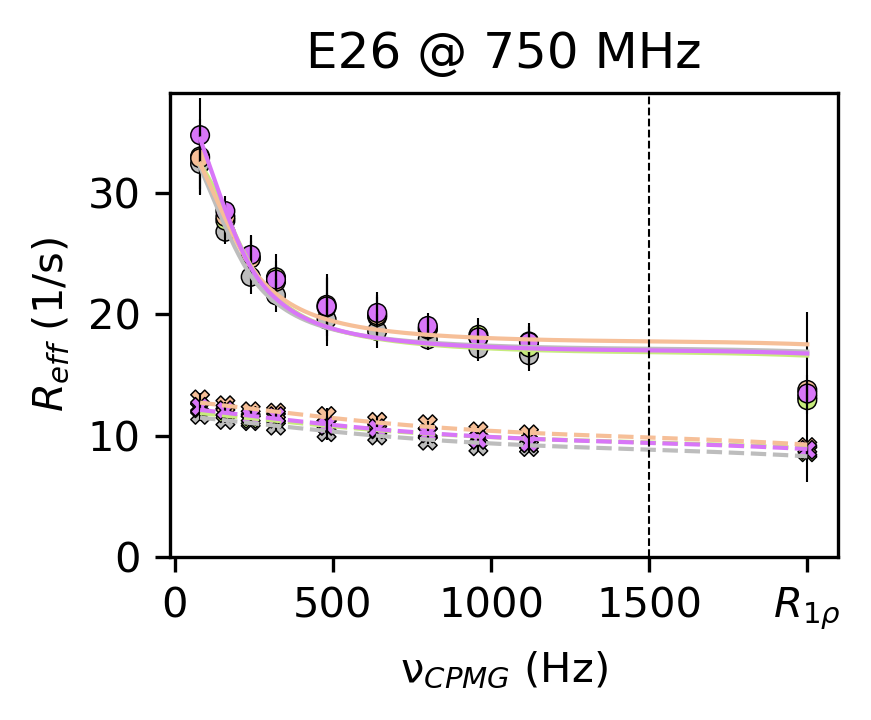

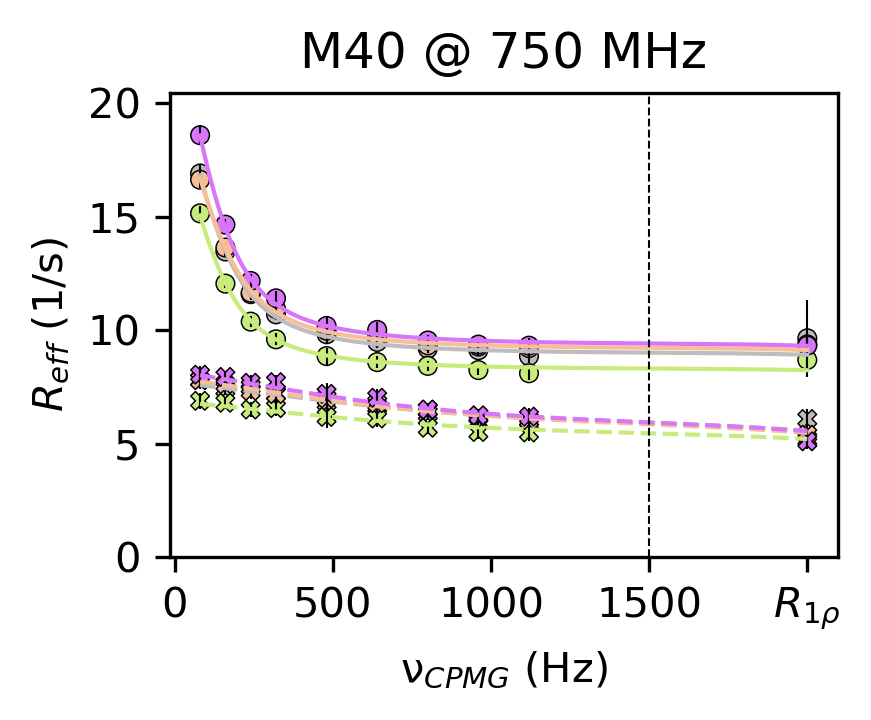

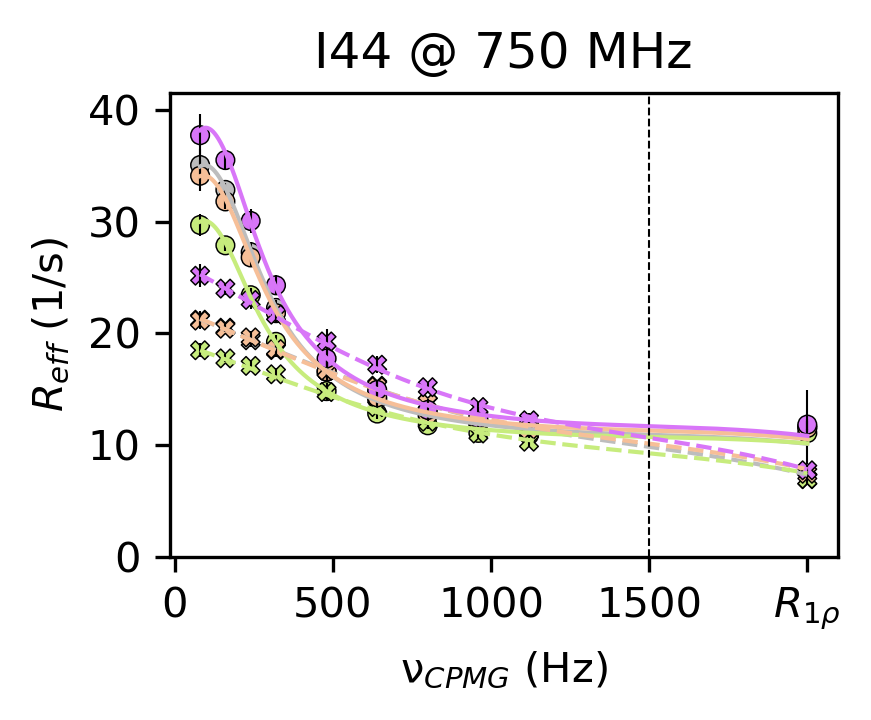

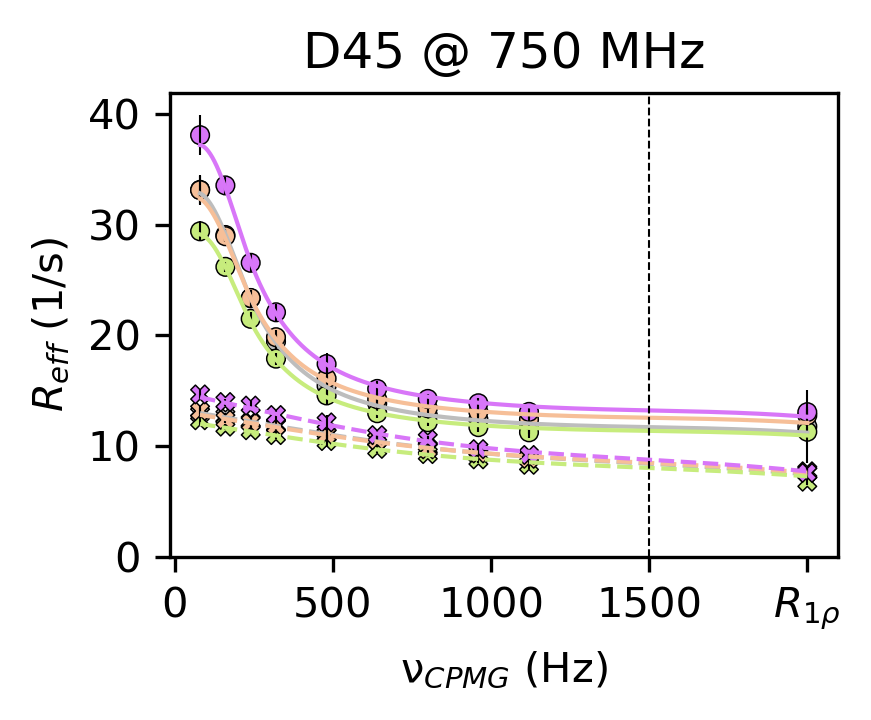

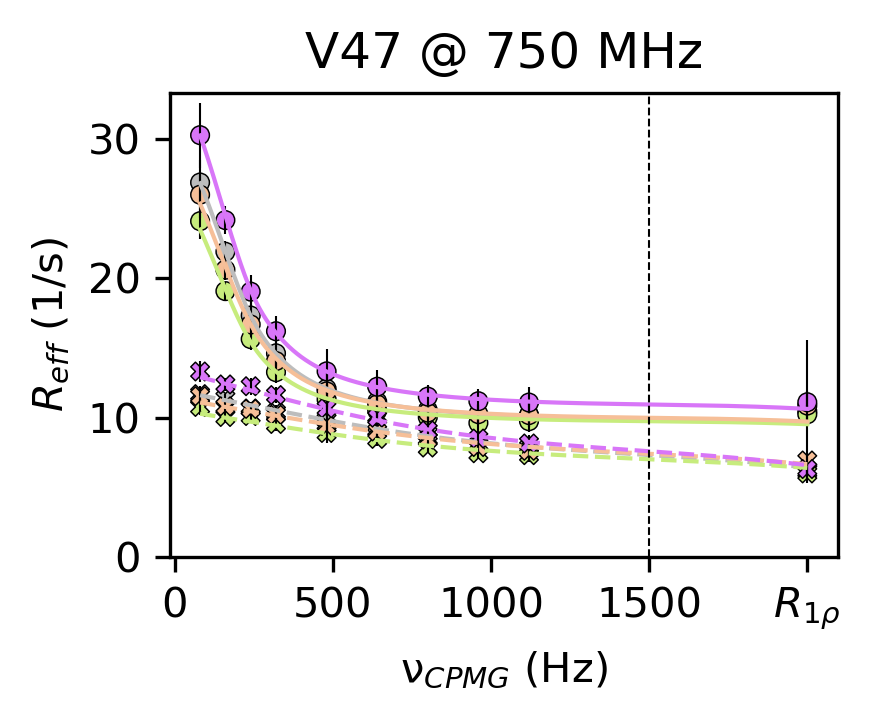

In [54]:
colors=['#bdbdbd', '#c7ec7d', '#f6bf98', '#d876f8']
# Set your custom color palette
customPalette= sns.set_palette(sns.color_palette(colors))

res=[24,26,40,44,45,47]
resn= ['K24','E26','M40','I44','D45','V47']
systems=['WT', 'L49I', 'I57V', 'L49I/I57V']
field=[600,750]
temp=[5,25]
linestyles =['-','--']


for k in field:
    j=0
    for i in res:
        dfp = df[(df['res']==i) & (df['field']==k)]
        
        fig, axs = plt.subplots(ncols=1,figsize=(3,2.5),dpi=300)
        
        sns.scatterplot(y='r2eff_exp',x='cpmgfr',data=dfp,hue = 'system', style='temp', palette=customPalette,s=20,label=None,edgecolor='k');#palette='colorblind'
        
        
        axs.errorbar(x=dfp['cpmgfr'], y=dfp['r2eff_exp'],yerr=dfp['r2eff_exp_err'], linestyle='none', color='black',markersize=20,elinewidth=0.5,label=None)
        
        #sns.lineplot(y='r2eff_fit',x='cpmgfr',data=dfp,hue = 'system',style='temp', palette=customPalette,linewidth =1,label=None);
        
        sys=0
        for system in systems:
            tempcurve = 0    
            for t in temp:
                dfp_plot = df[(df['res']==i) & (df['field']==k) & (df['temp']==t)& (df['system']==system)]
                xnew = np.linspace(80, 2000, num=4001, endpoint=True)
                x=dfp_plot['cpmgfr']
                y=dfp_plot['r2eff_fit']
                f = interp1d(x, y, kind='cubic')
                # print(x,y,f(xnew))
                plt.plot(xnew, f(xnew), linestyle =linestyles[tempcurve],marker=None,linewidth =1,color=colors[sys]) 
                tempcurve+=1
            sys+=1
        
        plt.plot([1500,1500],[0,50],'k--',linewidth =0.5)
#         print(dfp['r2eff_exp'].max())
        
        plt.ylim([0, dfp['r2eff_exp'].max()*1.1])
        plt.title(f"{resn[j]} @ {k} MHz")
        plt.ylabel('$ R_{eff} $'+' (1/s)')
        plt.xlabel(u'\u03BD'+'$_{CPMG}$'+' (Hz)')
        plt.xticks([0,500,1000,1500,2000],('0','500','1000','1500','$R$'+'$_{1\u03C1}$'));
        
        #plt.legend(['5\u00b0C','10\u00b0C','15\u00b0C','20\u00b0C','25\u00b0C'],bbox_to_anchor=(0.95, -0.3), ncol=2,prop={"size":5})
#         plt.legend(['5\u00b0C','10\u00b0C','15\u00b0C','20\u00b0C','25\u00b0C'],ncol=1,prop={"size":5})
        #plt.legend(['','','',''],prop={"size":5},bbox_to_anchor=(1.05, 1))
        #plt.legend(['WT', 'L49I', 'I57V', 'L49I/I57V','WT', 'L49I', 'I57V', 'L49I/I57V','','','','','','','','','','','',''],ncol=2,prop={"size":5})
        #plt.legend(['WT (5˚C)','WT (25˚C)','L49I (5˚C)','L49I (25˚C)','I57V (5˚C)','I57V (25˚C)','L49I/I57V (5˚C)','L49I/I57V (25˚C)'],ncol=1,prop={"size":5})
        plt.legend([],[], frameon=False)
        plt.tight_layout()

        #ax.set_xticks(xticks)
        
        plt.savefig(f'CI2_allVar_{resn[j]}_{k}MHz.pdf');
        j=j+1
        
# # title
# new_title = 'My title'
# g._legend.set_title(new_title)
# # replace labels
# new_labels = ['label 1', 'label 2']
# for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
#plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])


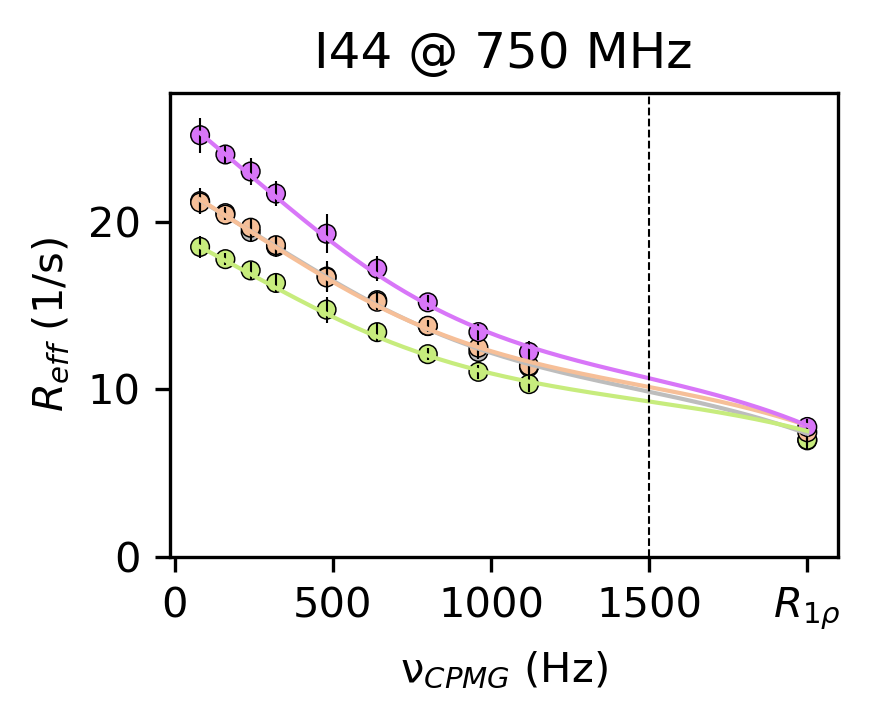

In [55]:

colors=['#bdbdbd', '#c7ec7d', '#f6bf98', '#d876f8']
# Set your custom color palette
customPalette= sns.set_palette(sns.color_palette(colors))

res=[44]
resn= ['I44']
systems=['WT', 'L49I', 'I57V', 'L49I/I57V']
field=[750]
temp=[25]
linestyles =['-','--']


for k in field:
    j=0
    for i in res:
        dfp = df[(df['res']==i) & (df['field']==k) & (df['temp']==25)]
        
        fig, axs = plt.subplots(ncols=1,figsize=(3,2.5),dpi=300)
        
        sns.scatterplot(y='r2eff_exp',x='cpmgfr',data=dfp,hue = 'system', style='temp', palette=customPalette,s=20,label=None,edgecolor='k');#palette='colorblind'
        
        
        axs.errorbar(x=dfp['cpmgfr'], y=dfp['r2eff_exp'],yerr=dfp['r2eff_exp_err'], linestyle='none', color='black',markersize=20,elinewidth=0.5,label=None)
        
        #sns.lineplot(y='r2eff_fit',x='cpmgfr',data=dfp,hue = 'system',style='temp', palette=customPalette,linewidth =1,label=None);
        
        sys=0
        for system in systems:
            tempcurve = 0    
            for t in temp:
                dfp_plot = df[(df['res']==i) & (df['field']==k) & (df['temp']==t)& (df['system']==system)]
                xnew = np.linspace(80, 2000, num=4001, endpoint=True)
                x=dfp_plot['cpmgfr']
                y=dfp_plot['r2eff_fit']
                f = interp1d(x, y, kind='cubic')
                # print(x,y,f(xnew))
                plt.plot(xnew, f(xnew), linestyle =linestyles[tempcurve],marker=None,linewidth =1,color=colors[sys]) 
                tempcurve+=1
            sys+=1
        
        plt.plot([1500,1500],[0,50],'k--',linewidth =0.5)
#         print(dfp['r2eff_exp'].max())
        
        plt.ylim([0, dfp['r2eff_exp'].max()*1.1])
        plt.title(f"{resn[j]} @ {k} MHz")
        plt.ylabel('$ R_{eff} $'+' (1/s)')
        plt.xlabel(u'\u03BD'+'$_{CPMG}$'+' (Hz)')
        plt.xticks([0,500,1000,1500,2000],('0','500','1000','1500','$R$'+'$_{1\u03C1}$'));
        
        #plt.legend(['5\u00b0C','10\u00b0C','15\u00b0C','20\u00b0C','25\u00b0C'],bbox_to_anchor=(0.95, -0.3), ncol=2,prop={"size":5})
        #plt.legend(['5\u00b0C','10\u00b0C','15\u00b0C','20\u00b0C','25\u00b0C'],ncol=1,prop={"size":5})
        #plt.legend(['','','',''],prop={"size":5},bbox_to_anchor=(1.05, 1))
        #plt.legend(['WT', 'L49I', 'I57V', 'L49I/I57V','WT', 'L49I', 'I57V', 'L49I/I57V','','','','','','','','','','','',''],ncol=2,prop={"size":5})
        #plt.legend(['WT (5˚C)','WT (25˚C)','L49I (5˚C)','L49I (25˚C)','I57V (5˚C)','I57V (25˚C)','L49I/I57V (5˚C)','L49I/I57V (25˚C)'],ncol=1,prop={"size":5})
        plt.legend([],[], frameon=False)
        plt.tight_layout()

        #ax.set_xticks(xticks)
        
        plt.savefig(f'CI2_allVar_{resn[j]}_{k}MHz_example.pdf');
        j=j+1
        
# # title
# new_title = 'My title'
# g._legend.set_title(new_title)
# # replace labels
# new_labels = ['label 1', 'label 2']
# for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
#plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
